## 1. train path의 정보가 다른 컬럼과 같은지 체크

In [3]:
import pandas as pd

train = pd.read_csv('/opt/ml/backup/input/data/train/train.csv')

In [3]:
train.sample(5)

,id,gender,race,age,path
2222,005520,female,Asian,51,005520_female_Asian_51
2126,005404,female,Asian,25,005404_female_Asian_25
1439,003507,male,Asian,57,003507_male_Asian_57
1584,003740,female,Asian,50,003740_female_Asian_50
805,001542,female,Asian,25,001542_female_Asian_25


In [4]:
train.describe(include='all')

,id,gender,race,age,path
count,2700,2700,2700,2700.000000,2700
unique,2699,2,1,NaN,2700
top,003397,female,Asian,NaN,003560_male_Asian_55
freq,2,1658,2700,NaN,1
mean,NaN,NaN,NaN,37.708148,NaN
std,NaN,NaN,NaN,16.985904,NaN
min,NaN,NaN,NaN,18.000000,NaN
25%,NaN,NaN,NaN,20.000000,NaN
50%,NaN,NaN,NaN,36.000000,NaN
75%,NaN,NaN,NaN,55.000000,NaN


In [5]:
path_list = []
for i in list(train['path']):
    index,gender,race,age = i.split("_")
    path_list.append([index,gender,race,int(age)])

In [6]:
path = pd.DataFrame(path_list)
path.columns = ['index','gender','race','age']

In [7]:
train.columns

Index(['id', 'gender', 'race', 'age', 'path'], dtype='object')

In [8]:
path.columns

Index(['index', 'gender', 'race', 'age'], dtype='object')

In [9]:
print(sum(path['gender'] != train['gender']))
print(sum(path['race'] != train['race']))
print(sum(path['age'] != train['age']))

0
0
0


### 같음
---

## 2. 성별, 연령별 barplot, histogram

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [11]:
group = train.groupby('gender').count()
group

,id,race,age,path
gender,,,,
female,1658,1658,1658,1658
male,1042,1042,1042,1042


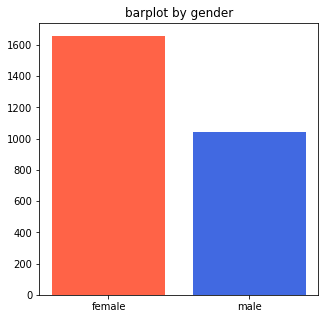

In [12]:
fig, axes = plt.subplots(1,1,figsize=(5,5))
color=['tomato','royalblue']
axes.bar(group.index,group['age'],color=color)
axes.set_title("barplot by gender")
plt.show()

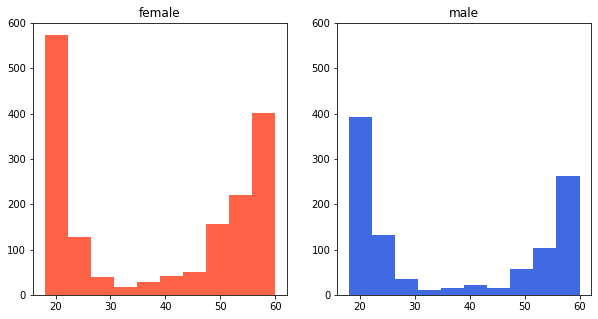

In [13]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
color=['tomato','royalblue']
axes[1].hist(train[train['gender'] == 'male']['age'], color=color[1])
axes[0].hist(train[train['gender'] == 'female']['age'], color=color[0])
for ax in axes:
    ax.set_ylim(0, 600)
axes[0].set_title('female')
axes[1].set_title('male')
plt.show()

## 여성이 남성보다 약 0.5배 더 많다.

## 두 성별의 분포는 비슷하다.

## 30대에 가까울수록 데이터가 적은 경향이 있다.
---

In [5]:
from ready_to_data import Sampling, refine_data


images_path = '/opt/ml/backup/input/data/train/images'
sampling_size_rate = 0.2

S = Sampling(images_path,sampling_size_rate)
test_image_list,test_mask_class,test_gender_class,test_age_class,test_mixed_class = refine_data(images_path,S.test_image_directory_names)
train_image_list,train_mask_class,train_gender_class,train_age_class,train_mixed_class = refine_data(images_path,S.train_image_directory_names)

## 3. train_data and test_data hitogram by class(ismask, gender, age)

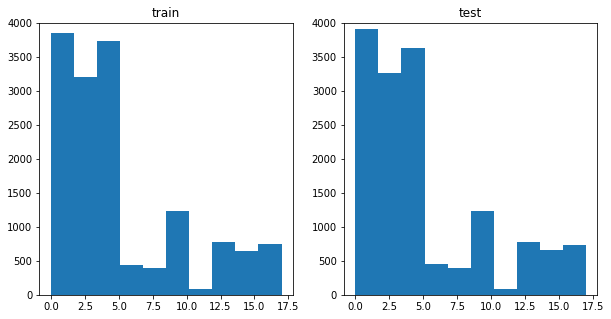

In [6]:
fig, axes = plt.subplots(1,2,figsize=(10,5))

axes[1].hist(train_mixed_class)
axes[0].hist(test_mixed_class*4)
for ax in axes:
    ax.set_ylim(0, 4000)
axes[0].set_title('train')
axes[1].set_title('test')
plt.show()

## 같은 분포이며, 샘플링 사이즈를 다르게 해도 동일한 결과가 나온다.
---

## 4. CenterCrop

이미지를 확인한 결과 모든 이미지의 중심에 사람의 얼굴이 있기 때문에 여백을 제거 할 필요를 느낌

In [12]:
import os
from PIL import Image

image_directory_names = [i for i in os.listdir(images_path) if '._' not in i]
image_directory_names.sort()

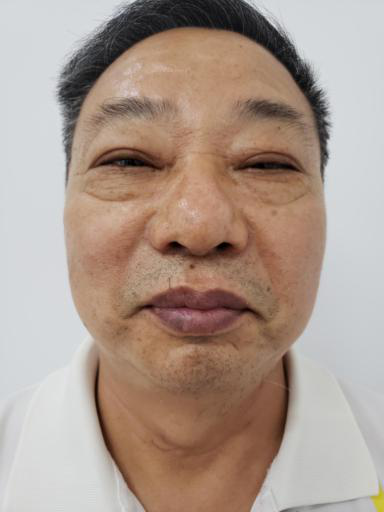

In [92]:
sample_image_path = os.path.join(images_path,image_directory_names[2150])
sample_image = Image.open(os.path.join(sample_image_path,'normal.jpg'))
sample_image

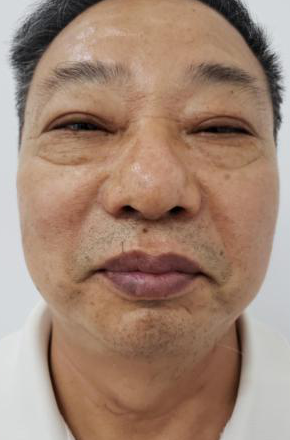

In [101]:
from torchvision import transforms

trans = transforms.CenterCrop((440,290))
trans(sample_image)

## 전부 사람들 얼굴이 가운데 있거나 가운데로 찍으려고 의도함.-> CenterCrop
---

In [89]:
import torch

a = torch.tensor([[1,2,6,4,5],[1,4,3,2,5]])
print(a.argmax(-1))

tensor([2, 4])
